In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("UNSW_NB15_training-set.csv")

In [4]:
df.head(20)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [5]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [7]:
df.shape

(82332, 45)

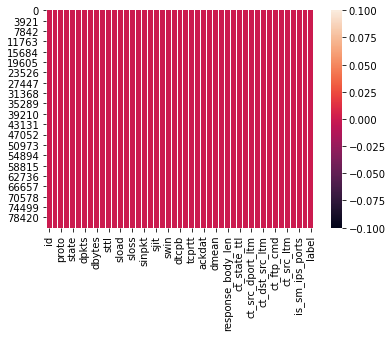

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
print("# Number of attack category : ")
df.groupby("attack_cat").count()['id']


# Number of attack category : 


attack_cat
Analysis            677
Backdoor            583
DoS                4089
Exploits          11132
Fuzzers            6062
Generic           18871
Normal            37000
Reconnaissance     3496
Shellcode           378
Worms                44
Name: id, dtype: int64

Text(0.5, 1.0, 'Repartition of attack types')

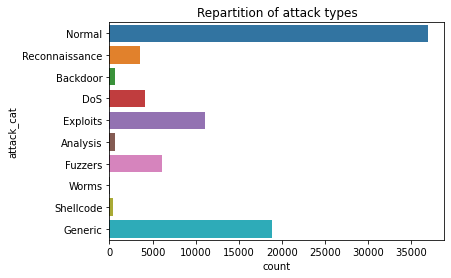

In [10]:
barplot = sns.countplot(data=df,y='attack_cat')
barplot.set_title('Repartition of attack types')

In [11]:
df["proto"].value_counts


<bound method IndexOpsMixin.value_counts of 0        udp
1        udp
2        udp
3        udp
4        udp
        ... 
82327    udp
82328    tcp
82329    arp
82330    arp
82331    udp
Name: proto, Length: 82332, dtype: object>

In [12]:
df["proto"].unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <a list of 6 Text major ticklabel objects>)

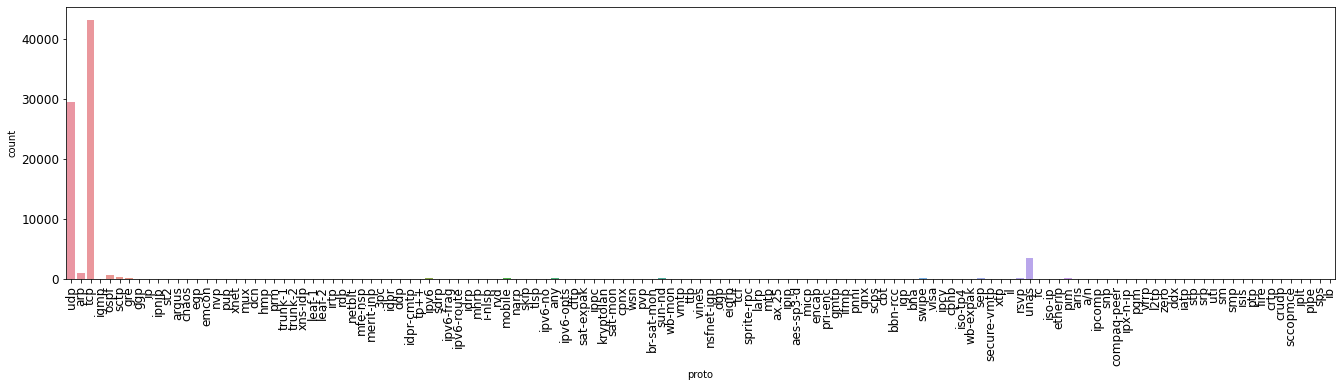

In [13]:
plt.subplots(figsize=(50,5))
plt.subplot(121)
sns.countplot(df.proto )
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

In [14]:
df["service"].value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [15]:
df["service"].unique

<bound method Series.unique of 0        -
1        -
2        -
3        -
4        -
        ..
82327    -
82328    -
82329    -
82330    -
82331    -
Name: service, Length: 82332, dtype: object>

Text(0.5, 1.0, 'Services')

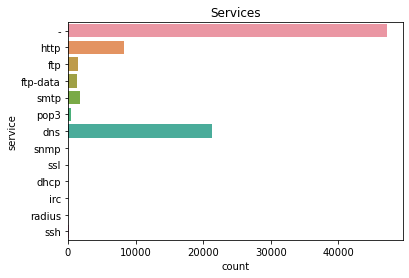

In [16]:
barplot = sns.countplot(data=df,y='service')
barplot.set_title('Services')

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 <a list of 10 Text major ticklabel objects>)

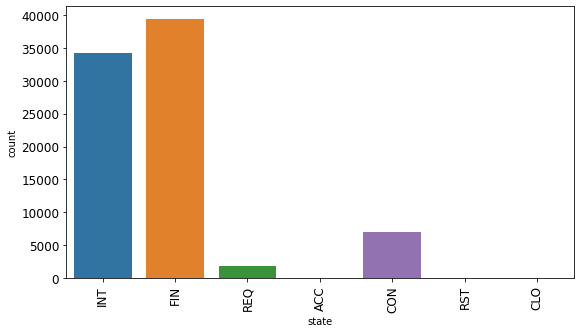

In [17]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.countplot(df.state )
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

In [18]:
df.corr()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
id,1.000000,0.016037,-0.020766,-0.037020,-0.005647,-0.031115,-0.121700,0.095939,0.306539,-0.003063,...,-0.317444,-0.346396,-0.297913,-0.049584,-0.049279,0.035399,-0.345738,-0.275818,0.097736,-0.387489
dur,0.016037,1.000000,0.280239,0.217507,0.225432,0.172492,-0.118031,-0.000986,0.090048,-0.076343,...,-0.086880,-0.081637,-0.071127,0.015724,0.015547,0.018879,-0.080789,-0.091253,0.027472,-0.001145
spkts,-0.020766,0.280239,1.000000,0.369554,0.965750,0.198324,-0.068249,-0.092536,0.054601,-0.044194,...,-0.053109,-0.055095,-0.061852,0.010361,0.010423,0.000443,-0.049367,-0.058815,-0.013960,-0.027731
dpkts,-0.037020,0.217507,0.369554,1.000000,0.175834,0.976419,-0.083173,-0.163830,0.036483,-0.054145,...,-0.062549,-0.067452,-0.075012,0.012473,0.012555,0.021041,-0.057374,-0.063169,-0.016103,-0.061515
sbytes,-0.005647,0.225432,0.965750,0.175834,1.000000,0.010036,-0.025102,-0.017866,0.049891,-0.015228,...,-0.020586,-0.020451,-0.024065,-0.002572,-0.002569,-0.004626,-0.021540,-0.030049,-0.004910,0.020641
dbytes,-0.031115,0.172492,0.198324,0.976419,0.010036,1.000000,-0.047978,-0.114537,0.012537,-0.031266,...,-0.035335,-0.038965,-0.044048,-0.006521,-0.006498,0.022901,-0.033301,-0.034416,-0.009267,-0.032632
rate,-0.121700,-0.118031,-0.068249,-0.083173,-0.025102,-0.047978,1.000000,0.388155,-0.453913,0.550104,...,0.345573,0.366238,0.358902,-0.050093,-0.049952,-0.112432,0.327563,0.370816,-0.058689,0.328629
sttl,0.095939,-0.000986,-0.092536,-0.163830,-0.017866,-0.114537,0.388155,1.000000,-0.033338,0.252901,...,0.287568,0.315776,0.335118,-0.089618,-0.089897,-0.174840,0.236869,0.304131,-0.187933,0.504159
dttl,0.306539,0.090048,0.054601,0.036483,0.049891,0.012537,-0.453913,-0.033338,1.000000,-0.293939,...,-0.349865,-0.357793,-0.364181,0.052195,0.050854,0.208628,-0.403289,-0.454576,-0.087019,-0.098591
sload,-0.003063,-0.076343,-0.044194,-0.054145,-0.015228,-0.031266,0.550104,0.252901,-0.293939,1.000000,...,0.112361,0.083445,0.155386,-0.032551,-0.032464,-0.072814,0.110013,0.160250,-0.038030,0.124548


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

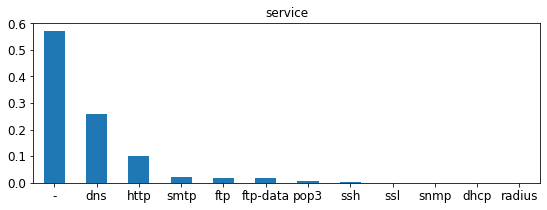

In [19]:
plt.subplots(figsize=(20,10))
plt.subplot(321)
df.service.value_counts(100)[:12].plot(kind='bar', title="service", fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)


In [20]:
df_num=df.select_dtypes(["float64","int64"])
df_cat=df.select_dtypes("object")


In [21]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    #create object of LabelEncoder
    le=LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
#check
df_cat.head()

<ipython-input-21-63df0db736ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = le.fit_transform(df_cat[col])


,proto,service,state,attack_cat
0,117,0,4,6
1,117,0,4,6
2,117,0,4,6
3,117,0,4,6
4,117,0,4,6


In [22]:
df_new = pd.concat([df_num,df_cat],axis=1)
df_new.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto,service,state,attack_cat
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,0,0,1,2,0,0,117,0,4,6
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,0,0,1,2,0,0,117,0,4,6
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,0,0,1,3,0,0,117,0,4,6
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,0,0,2,3,0,0,117,0,4,6
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,0,0,2,3,0,0,117,0,4,6


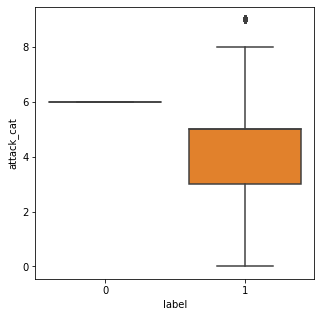

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_new,y="attack_cat",x="label")
plt.show()

Hear we can see theair is some outlier 

In [24]:
df_new[df_new["attack_cat"]>8]

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto,service,state,attack_cat
387,388,0.201833,10,6,1308,268,74.318869,254,252,4.669207e+04,...,0,1,1,2,0,1,111,5,3,9
821,822,4.235010,46,236,2314,308456,66.351671,254,252,4.276731e+03,...,0,1,1,1,0,1,111,5,3,9
1111,1112,0.196822,10,6,1022,268,76.210992,254,252,3.739419e+04,...,0,1,1,1,0,1,111,5,3,9
1586,1587,1.260943,10,6,1282,268,11.895858,254,252,7.321504e+03,...,0,1,1,1,0,1,111,5,3,9
2853,2854,0.000005,2,0,92,0,200000.005100,254,0,7.360000e+07,...,0,0,19,1,0,1,117,0,4,9
3662,3663,0.678688,10,6,1306,268,22.101467,254,252,1.386204e+04,...,0,1,2,1,0,1,111,5,3,9
4262,4263,0.000006,2,0,2050,0,166666.660800,254,0,1.366667e+09,...,0,0,1,1,0,1,117,0,4,9
5297,5298,0.928794,10,6,1302,268,16.149975,254,252,1.009481e+04,...,0,1,1,1,0,1,111,5,3,9
6303,6304,0.226263,10,6,1302,268,66.294533,254,252,4.143850e+04,...,0,1,1,2,0,1,111,5,3,9
6481,6482,0.390372,14,6,8682,268,48.671523,254,252,1.652168e+05,...,0,1,1,1,0,1,111,5,3,9


In [25]:
df_new.drop([387,821,1111,1586,2853,3662,4262,5297,6303,6481,6667,7207,8496,8792,8852,8890,9003,10689,11471,11515,43984,44486,44896,45794,47087,47340,47427,48587,49587,49541,50086,50679,51485,51827,51979,52259,53379,54965,55336,59795,60346,62856,63429,63663,63891],inplace=True)

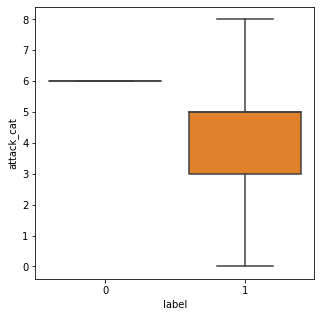

In [26]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_new,y="attack_cat",x="label")
plt.show()

so hear we can see out lier is removed

we remove some out liers and  doing various modeling

In [38]:
X=df_new.drop("label",axis=1) #input features
Y=df_new["label"]

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [40]:
def create_model(model):
    model.fit(X_train,Y_train)#we train the model
    y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_test,y_pred))
    return model


# LogisticRegression

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
from sklearn.linear_model import LogisticRegression  

In [43]:
lr=LogisticRegression()

In [44]:
create_model(lr)

              precision    recall  f1-score   support

           0       0.67      0.88      0.76     10978
           1       0.87      0.66      0.75     13700

    accuracy                           0.76     24678
   macro avg       0.77      0.77      0.76     24678
weighted avg       0.78      0.76      0.76     24678

Confusion Matrix : 
[[9634 1344]
 [4656 9044]]


LogisticRegression()

# BaggingClassifier

In [45]:
from sklearn.ensemble import BaggingClassifier 

In [46]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=780,random_state=1)

In [47]:
X_train.shape

(57580, 44)

In [48]:
create_model(bc)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.70      0.87      0.78     10978
           1       0.87      0.70      0.78     13700

    accuracy                           0.78     24678
   macro avg       0.79      0.79      0.78     24678
weighted avg       0.79      0.78      0.78     24678

Confusion Matrix : 
[[9544 1434]
 [4090 9610]]


BaggingClassifier(base_estimator=LogisticRegression(), max_samples=780,
                  random_state=1)

# LinearSVC

In [49]:
#use SVM : support vector machine :
from sklearn.svm import LinearSVC

In [50]:
svc=LinearSVC(random_state=1)


In [51]:
create_model(svc)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           0       0.83      0.48      0.61     10978
           1       0.69      0.92      0.79     13700

    accuracy                           0.73     24678
   macro avg       0.76      0.70      0.70     24678
weighted avg       0.75      0.73      0.71     24678

Confusion Matrix : 
[[ 5299  5679]
 [ 1079 12621]]


LinearSVC(random_state=1)

# AdaBoostClassifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
ada=AdaBoostClassifier(n_estimators=50) 

In [54]:
create_model(ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10978
           1       1.00      1.00      1.00     13700

    accuracy                           1.00     24678
   macro avg       1.00      1.00      1.00     24678
weighted avg       1.00      1.00      1.00     24678

Confusion Matrix : 
[[10978     0]
 [    0 13700]]


AdaBoostClassifier()

# DecisionTreeClassifier

In [55]:
from sklearn.tree import DecisionTreeClassifier 

In [56]:
#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier() 

In [57]:
#call function to train and test the model
dt=create_model(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10978
           1       1.00      1.00      1.00     13700

    accuracy                           1.00     24678
   macro avg       1.00      1.00      1.00     24678
weighted avg       1.00      1.00      1.00     24678

Confusion Matrix : 
[[10978     0]
 [    0 13700]]


In [58]:

dt.feature_importances_ 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [59]:
X.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto', 'service',
       'state', 'attack_cat'],
      dtype='object')

In [60]:
#visualise the tree 
from sklearn import tree

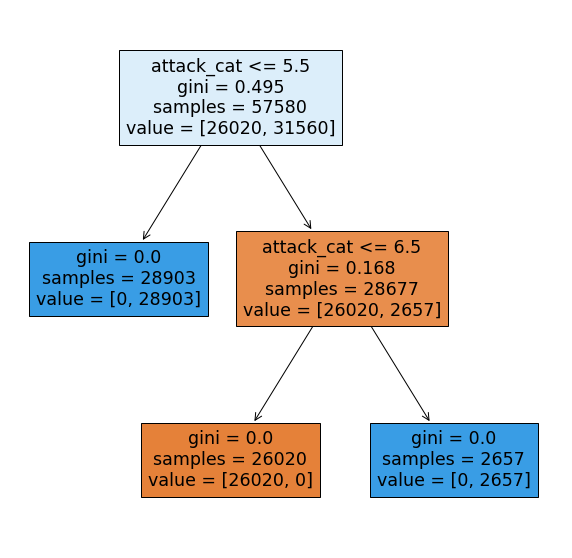

In [61]:
features=X.columns #features user defined list object which hold all input
fig=plt.figure(figsize=(10,10))
_=tree.plot_tree(dt,feature_names=features,filled=True)